In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Preprocessing
# One-hot encode categorical variables
categorical_features = ['City']
numeric_features = ['weight_factor', 'random_trip_distance', 'standard_deviation', 'avg_trip_chain_day']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Define the model pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', RandomForestRegressor())])

# Separating features and target variable
X = ev_data.drop('habitual_trip_distance', axis=1)
y = ev_data['habitual_trip_distance']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the Model
model.fit(X_train, y_train)

# Predicting and Model Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


In [ ]:
import pandas as pd

# Load the uploaded CSV file
file_path = '/content/ITCD parameters - ITCD parameters.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure
data.head()


,City,weight_factor,random_trip_distance,standard_deviation,habitual_trip_distance,avg_trip_chain_day
0,Beijing,0.800000,47.493,0.41325,50.059,0.519481
1,Beijing,0.911775,33.105,3.90200,41.955,0.543689
2,Beijing,0.296000,25.640,6.26850,20.947,0.381579
3,Beijing,0.365000,41.748,15.20350,38.211,0.230769
4,Beijing,0.267415,53.317,25.07775,77.802,0.885246


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load your data
# Replace 'your_file.csv' with the path to your CSV file
data = pd.read_csv('/content/ITCD parameters - ITCD parameters.csv')

# Selecting the predictor variables and the target variable
X = data[['weight_factor', 'standard_deviation']]
y = data['habitual_trip_distance']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating the linear regression model
model = LinearRegression()

# Fitting the model to the training data
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Calculating the performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Displaying the performance metrics
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 2153.873417862115
R-squared: 0.2866213779897363


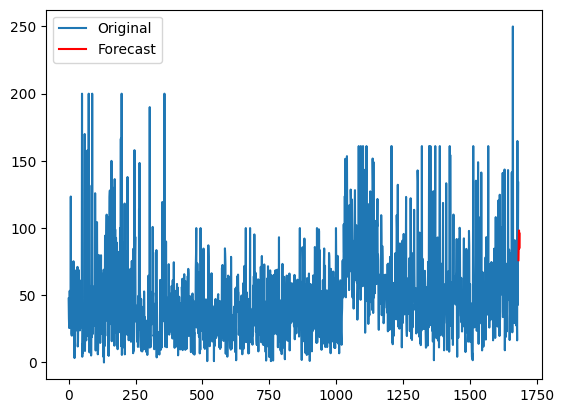

In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv('/content/ITCD parameters - ITCD parameters.csv')

# Assuming 'Random Trip Distance' is the time series data
time_series = data['random_trip_distance']

# Fit ARIMA model (example parameters: p=5, d=1, q=0)
model = ARIMA(time_series, order=(5,1,0))
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=5)  # forecast next 5 periods

# Plotting the results
plt.plot(time_series, label='Original')
plt.plot(forecast, label='Forecast', color='red')
plt.legend()
plt.show()


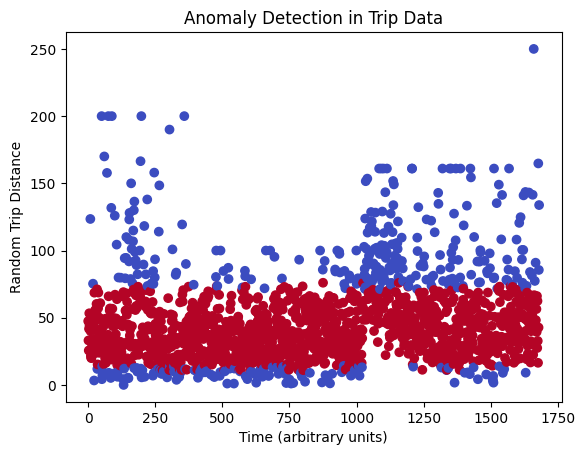

In [ ]:
#anamoly
from sklearn.ensemble import IsolationForest

# Assuming 'Random Trip Distance' is the feature we want to find anomalies in
X = data[['random_trip_distance']]

# Fit Isolation Forest
clf = IsolationForest(random_state=42)
clf.fit(X)

# Predict anomalies (-1 for anomalies, 1 for normal)
anomalies = clf.predict(X)

# Add anomalies to the dataset for visualization
data['anomaly'] = anomalies

# Visualizing anomalies
plt.scatter(data.index, data['random_trip_distance'], c=data['anomaly'], cmap='coolwarm')
plt.xlabel('Time (arbitrary units)')
plt.ylabel('Random Trip Distance')
plt.title('Anomaly Detection in Trip Data')
plt.show()


In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Assuming the data is loaded
data = pd.read_csv('/content/ITCD parameters - ITCD parameters.csv')

# For demonstration, let's assume 'random_trip_distance' is our time series data
# We also assume that the data is sorted in a time order
time_series = data['random_trip_distance']

# Fit ARIMA model
# Choosing p=5, d=1, q=0 as an example.
# In practice, these parameters should be chosen based on model diagnostics (like ACF and PACF plots)
model = ARIMA(time_series, order=(5,1,0))
model_fit = model.fit()

# Forecasting the next 5 periods
forecast = model_fit.forecast(steps=5)

forecast


1681    76.092114
1682    89.813277
1683    98.249873
1684    84.881685
1685    95.902077
Name: predicted_mean, dtype: float64

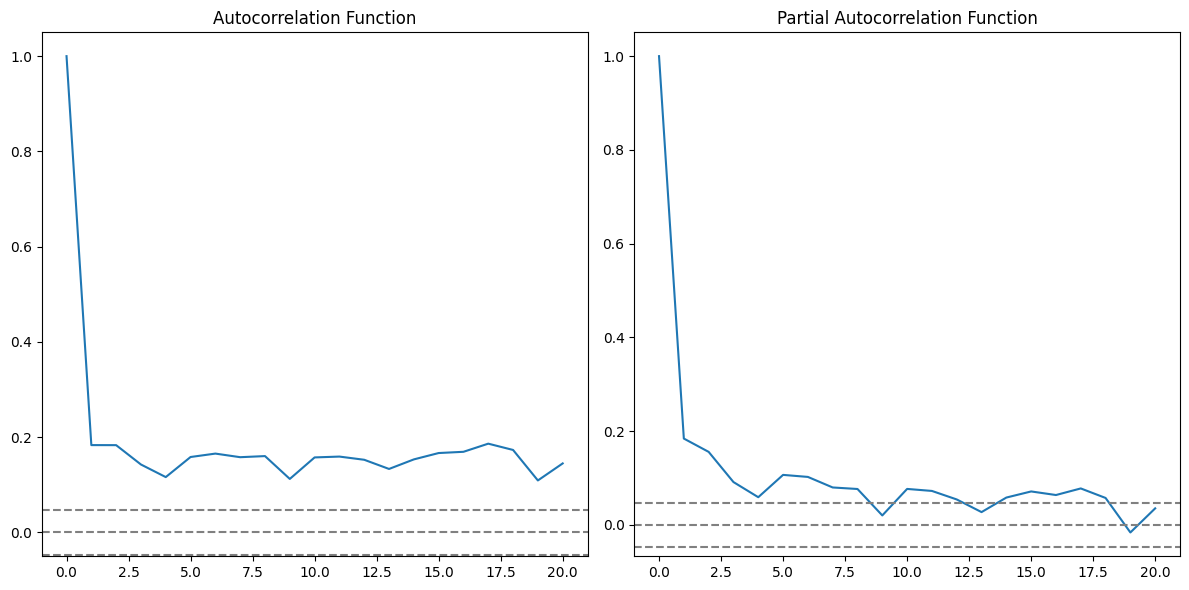

In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import acf, pacf
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
data = pd.read_csv('/content/ITCD parameters - ITCD parameters.csv')

# Selecting the 'random_trip_distance' column as our time series data
time_series = data['random_trip_distance']

# Calculate ACF and PACF
lag_acf = acf(time_series, nlags=20)
lag_pacf = pacf(time_series, nlags=20, method='ols')

# Plot ACF and PACF
plt.figure(figsize=(12, 6))

# Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(time_series)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(time_series)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')

# Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(time_series)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(time_series)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')

plt.tight_layout()
plt.show()


The Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots for your 'Random Trip Distance' data are now displayed.

    ACF Plot: This plot helps to identify the order of the moving average (MA) component in an ARIMA model. The ACF plot shows the correlation of the series with itself at different lags.

    PACF Plot: This plot helps to identify the order of the autoregressive (AR) component. The PACF plot shows the partial correlation of the series with itself at different lags.

When using these plots to determine the parameters for an ARIMA model, you typically look for where the ACF and PACF plots cross the upper confidence interval for the first time. This point indicates the optimal lag value for the AR and MA components. The order of differencing (d) is typically determined by the number of differencings required to make the series stationary.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


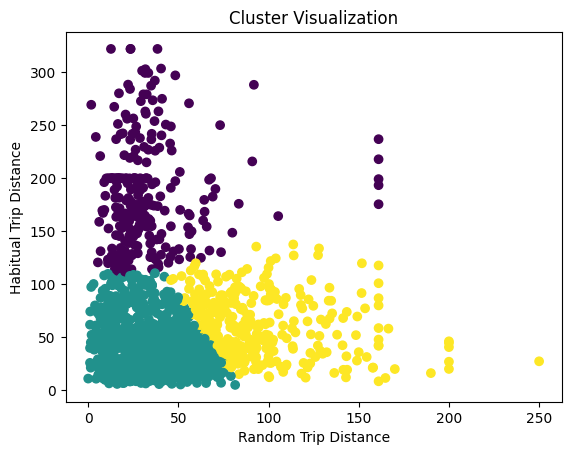

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# We will use the KMeans clustering algorithm
# For demonstration, let's assume we want to cluster the data based on 'random_trip_distance' and 'habitual_trip_distance'

# Selecting relevant features for clustering
features = data[['random_trip_distance', 'habitual_trip_distance']]

# Running KMeans clustering
# Let's choose 3 clusters for demonstration purposes
kmeans = KMeans(n_clusters=3, random_state=0).fit(features)

# Adding the cluster labels to the dataset
data['cluster'] = kmeans.labels_

# Plotting the clusters
plt.scatter(data['random_trip_distance'], data['habitual_trip_distance'], c=data['cluster'], cmap='viridis')
plt.xlabel('Random Trip Distance')
plt.ylabel('Habitual Trip Distance')
plt.title('Cluster Visualization')
plt.show()


In [ ]:

from sklearn.linear_model import Ridge

ridgeReg = Ridge(alpha=0.05)
ridgeReg.fit(X_train,y_train)
pred = ridgeReg.predict(X_test)
mse = np.mean((pred - y_test)**2)

In [ ]:
mse

2153.78512120123

In [ ]:
ridgeReg.score(X_test,y_test)

0.28665062248931905

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
data = pd.read_csv('/content/ITCD parameters - ITCD parameters.csv')
# Basic feature engineering: creating new features or transforming existing ones
data['distance_ratio'] = data['habitual_trip_distance'] / data['random_trip_distance']
data['distance_diff'] = data['habitual_trip_distance'] - data['random_trip_distance']



In [ ]:
data

,City,weight_factor,random_trip_distance,standard_deviation,habitual_trip_distance,avg_trip_chain_day,distance_ratio,distance_diff
0,Beijing,0.800000,47.4930,0.41325,50.0590,0.519481,1.054029,2.5660
1,Beijing,0.911775,33.1050,3.90200,41.9550,0.543689,1.267331,8.8500
2,Beijing,0.296000,25.6400,6.26850,20.9470,0.381579,0.816966,-4.6930
3,Beijing,0.365000,41.7480,15.20350,38.2110,0.230769,0.915277,-3.5370
4,Beijing,0.267415,53.3170,25.07775,77.8020,0.885246,1.459234,24.4850
...,...,...,...,...,...,...,...,...
1676,Germany,0.929800,16.4487,1.00000,14.1562,1.000000,0.860627,-2.2925
1677,Germany,0.349300,164.7958,8.77680,11.5531,0.575760,0.070106,-153.2427
1678,Germany,0.990000,42.7265,16.77150,23.6344,0.600000,0.553156,-19.0921
1679,Germany,0.616900,85.5514,1.00290,77.8185,0.746180,0.909611,-7.7329


In [ ]:
# Select features and target
X = data[['weight_factor', 'standard_deviation', 'habitual_trip_distance', 'avg_trip_chain_day', 'distance_ratio', 'distance_diff']]
y = data['random_trip_distance']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting Regressor
gbr = GradientBoostingRegressor(random_state=42)

# Define the grid of parameters to search
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5]
}

# Initialize Grid Search
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='r2')

# Perform Grid Search
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_


Fitting 3 folds for each of 8 candidates, totalling 24 fits


In [ ]:
# Use the best estimator from grid search
best_gbr = grid_search.best_estimator_

# Predict on the test set
y_pred = best_gbr.predict(X_test)

# Calculate R2 score
r2 = r2_score(y_test, y_pred)


In [ ]:
print("Best Parameters:", best_params)
print("R2 Score on Test Set:", r2)


Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
R2 Score on Test Set: 0.9860584356568619
